In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [3]:
data = pd.read_csv('/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv')
data.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


# Clean the Data

In this part we will delete "," in numbers. 

In [5]:
data['Subscribers'] = data['Subscribers'].str.replace(',', '')
data['Video Views'] = data['Video Views'].str.replace(',', '')
data['Video Count'] = data['Video Count'].str.replace(',', '')


In [6]:
data['Subscribers'] = data['Subscribers'].astype('int')
data['Video Views'] = data['Video Views'].astype('int')
data['Video Count'] = data['Video Count'].astype('int')

In [7]:
data.head(n=100)

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
...,...,...,...,...,...,...,...
95,96,Like Nastya ESP,35900000,17250777103,691,Entertainment,2017
96,97,Ozuna,35800000,22255148830,162,Music,2016
97,98,Maria Clara & JP,35500000,22536784457,693,People & Blogs,2015
98,99,Sony PAL,35300000,25906208404,21627,Shows,2014


Renaming colums

In [8]:
data.rename(columns={"Youtube Channel":"youtube_channel",
                   "Video Views":"video_views",
                   "Video Count":"video_count",
                    "Rank":"rank",
                    "Subscribers":"subscribers",
                    "Category":"category",
                    "Started":"started"},
          inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rank             1000 non-null   int64 
 1   youtube_channel  1000 non-null   object
 2   subscribers      1000 non-null   int64 
 3   video_views      1000 non-null   int64 
 4   video_count      1000 non-null   int64 
 5   category         1000 non-null   object
 6   started          1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


# Visualisation

Find all channels which category is Education. Show name,count of subscribers and video views.

In [9]:
query="SELECT youtube_channel,subscribers,video_views FROM data WHERE category LIKE 'Education' "

In [10]:
data_education_channels = sqldf(query)
data_education_channels.head(n=100)

,youtube_channel,subscribers,video_views
0,Cocomelon - Nursery Rhymes,152000000,149084178448
1,Pinkfong Baby Shark - Kids' Songs & Stories,64600000,35934421688
2,ChuChu TV Nursery Rhymes & Kids Songs,61100000,41904239949
3,BillionSurpriseToys - English Kids Songs & Car...,49700000,8662901485
4,Infobells - Hindi,48400000,27621598218
5,Little Baby Bum - Nursery Rhymes & Kids Songs,40600000,38573516896
6,Super Simple Songs - Kids Songs,37400000,40905820903
7,CVS 3D Rhymes & Kids Songs,31700000,19319626738
8,BabyBus - Kids Songs and Cartoons,31300000,25291836510
9,Genevieve's Playhouse - Learning Videos for Kids,31100000,22122295687


In [11]:
query_started_2006_2015=" SELECT youtube_channel,subscribers,video_views,category FROM data WHERE started BETWEEN 2006 AND 2015 "

In [12]:
data_started_2006_2015 = sqldf(query_started_2006_2015)
data_started_2006_2015.head(n=50)

,youtube_channel,subscribers,video_views,category
0,T-Series,234000000,212900271553,Music
1,YouTube Movies,161000000,0,Film & Animation
2,Cocomelon - Nursery Rhymes,152000000,149084178448,Education
3,SET India,150000000,137828094104,Shows
4,MrBeast,128000000,21549128785,Entertainment
5,Music,118000000,0,https://us.youtubers.me/global/all/top-1000-mo...
6,PewDiePie,111000000,28851883250,Gaming
7,✿ Kids Diana Show,106000000,86638570921,People & Blogs
8,Gaming,93300000,0,https://us.youtubers.me/global/all/top-1000-mo...
9,WWE,92800000,73577695222,Sports


In [13]:
data.sort_values(by='subscribers')

,rank,youtube_channel,subscribers,video_views,video_count,category,started
999,1000,Oum Walid,11400000,2480064722,1598,People & Blogs,2015
998,999,Painzeiro,11400000,2143444281,946,People & Blogs,2015
997,998,YtCrash,11400000,3825084,1,Education,2015
980,981,Airrack,11500000,1542774923,159,Entertainment,2015
981,982,Vy Qwaint,11500000,5652341273,559,Howto & Style,2014
...,...,...,...,...,...,...,...
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012
3,4,SET India,150000000,137828094104,103200,Shows,2006
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015


Show distinct Categories using SQL

In [14]:
query_distinct_category = "SELECT DISTINCT category FROM data"

In [15]:
data_distinct_category = sqldf(query_distinct_category)
data_distinct_category.head(70)

,category
0,Music
1,Film & Animation
2,Education
3,Shows
4,Entertainment
5,https://us.youtubers.me/global/all/top-1000-mo...
6,Gaming
7,People & Blogs
8,Sports
9,Howto & Style


Show distinct Categories using value_counts()

In [16]:
data['category'].value_counts().head(18)

Entertainment                                                                   238
Music                                                                           217
People & Blogs                                                                  132
Gaming                                                                           94
Comedy                                                                           68
Film & Animation                                                                 50
Education                                                                        45
Howto & Style                                                                    43
https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels     30
News & Politics                                                                  27
Science & Technology                                                             18
Shows                                                                       

<AxesSubplot:ylabel='category'>

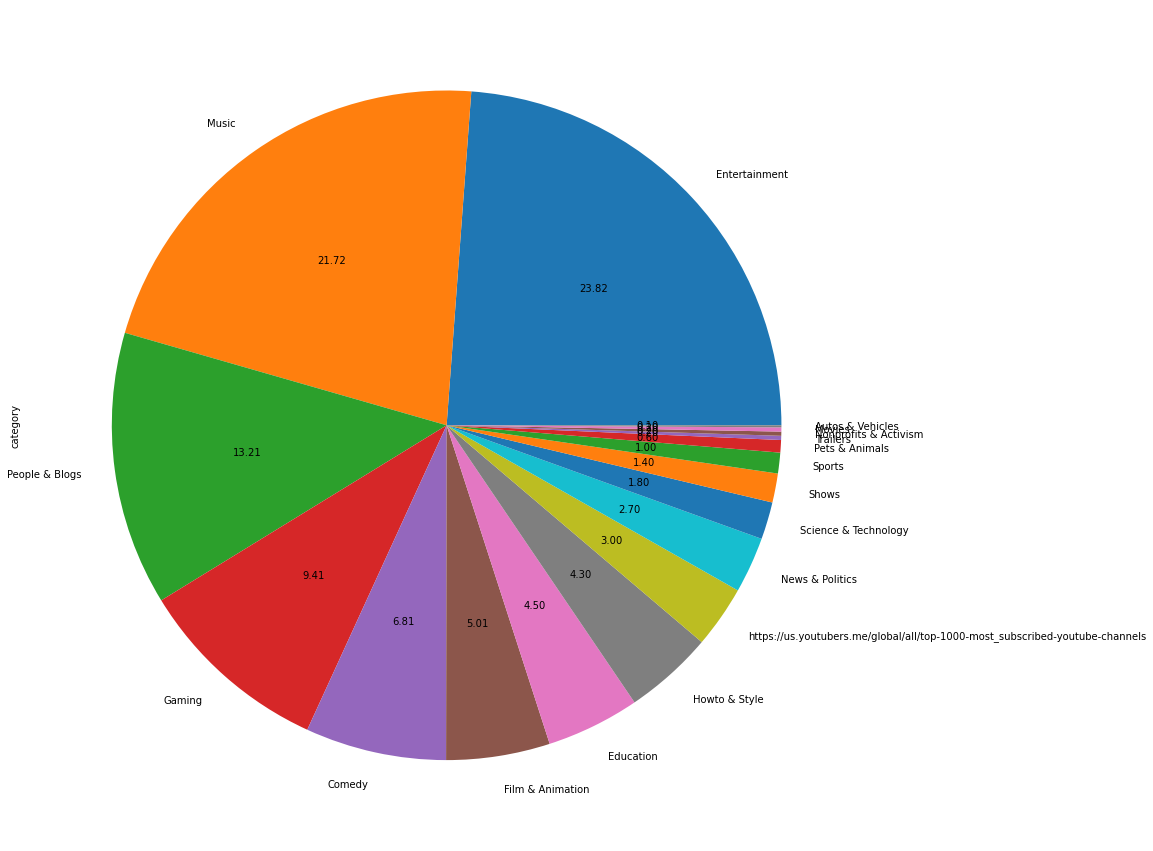

In [17]:
data['category'].value_counts().head(18).plot(kind='pie', figsize=(15, 35), autopct='%1.2f')